# Statistics Full Crash Course | Crash Course Statistics With R

Video: https://www.youtube.com/watch?v=SuEtKALBOVQ

Data: https://sta220.utstat.utoronto.ca/data/

## Week 1

In [1]:
library(rio)

set_plot_dim <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

In [2]:
df1 <- import("./data/LifeExpDatacomplete.txt")
str(df1)

'data.frame':	197 obs. of  5 variables:
 $ Country: chr  "Afghanistan" "Albania" "Algeria" "Angola" ...
 $ Region : chr  "SAs" "EuCA" "MENA" "SSA" ...
 $ LifeExp: num  48.7 76.9 73.1 51.1 75.9 ...
 $ GDP    : num  NA NA 6407 5519 15741 ...
 $ HIV    : num  NA NA 0.1 2 0.5 0.1 NA 0.1 0.3 0.1 ...


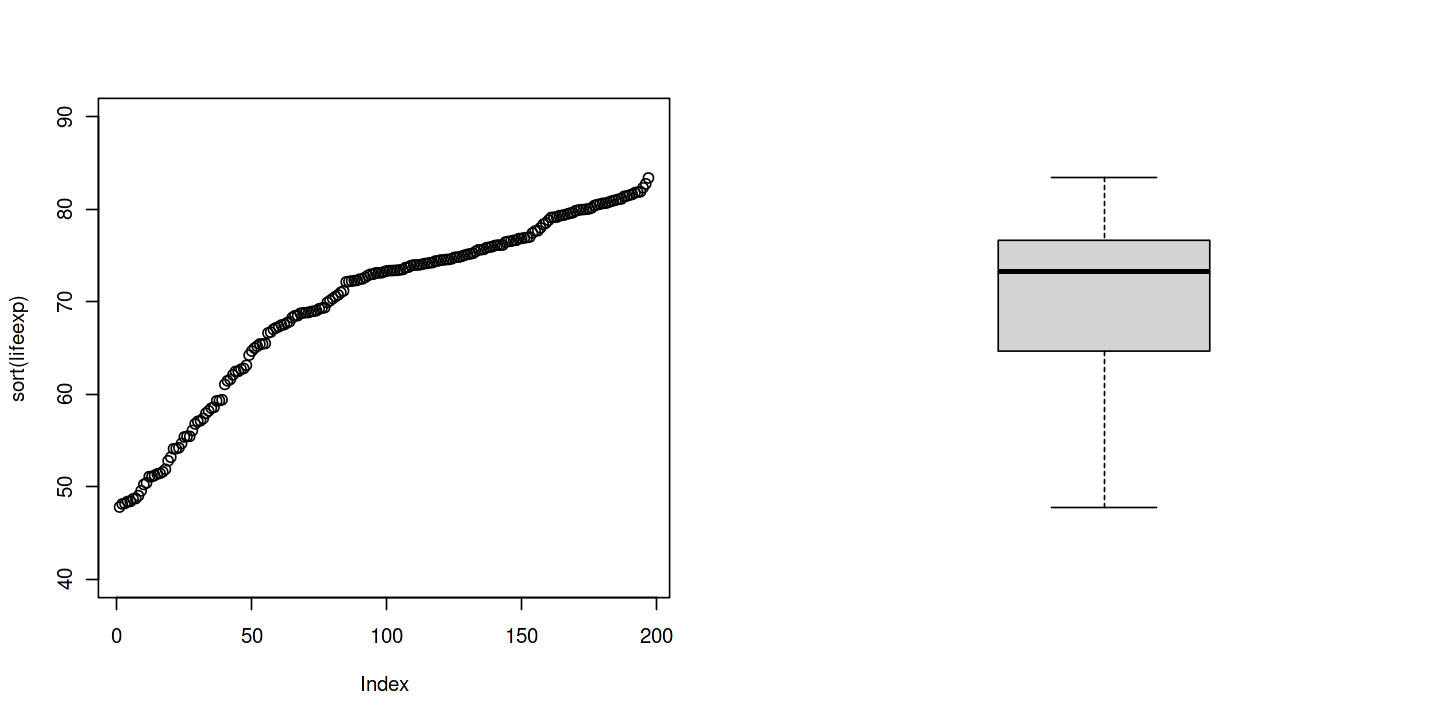

In [3]:
set_plot_dim(12,6)
par(mfrow=c(1,2))

lifeexp <- df1[,3]
plot(sort(lifeexp), ylim=c(40,90), )
boxplot(lifeexp, ylim=c(40,90), frame=F, yaxt = "n")

par(mfrow=c(1,1))

In [18]:
summary(lifeexp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  47.79   64.67   73.23   69.86   76.65   83.39 

In [5]:
df2 <- import("./data/SkeletonDatacomplete.txt")
str(df2)

'data.frame':	400 obs. of  8 variables:
 $ Sex       : int  2 1 1 1 1 1 1 1 1 1 ...
 $ BMIcat    : chr  "underweight" "normal" "overweight" "overweight" ...
 $ BMIquant  : num  15.7 23 27.9 27.8 21.4 ...
 $ Age       : int  78 44 72 59 60 34 50 73 70 60 ...
 $ DGestimate: int  44 32 32 44 32 25 32 50 39 44 ...
 $ DGerror   : int  -34 -12 -40 -15 -28 -9 -18 -23 -31 -16 ...
 $ SBestimate: int  60 35 61 61 46 35 35 61 46 46 ...
 $ SBerror   : int  -18 -9 -11 2 -14 1 -15 -12 -24 -14 ...


[1] "Trimmed mean:  -13.821875"

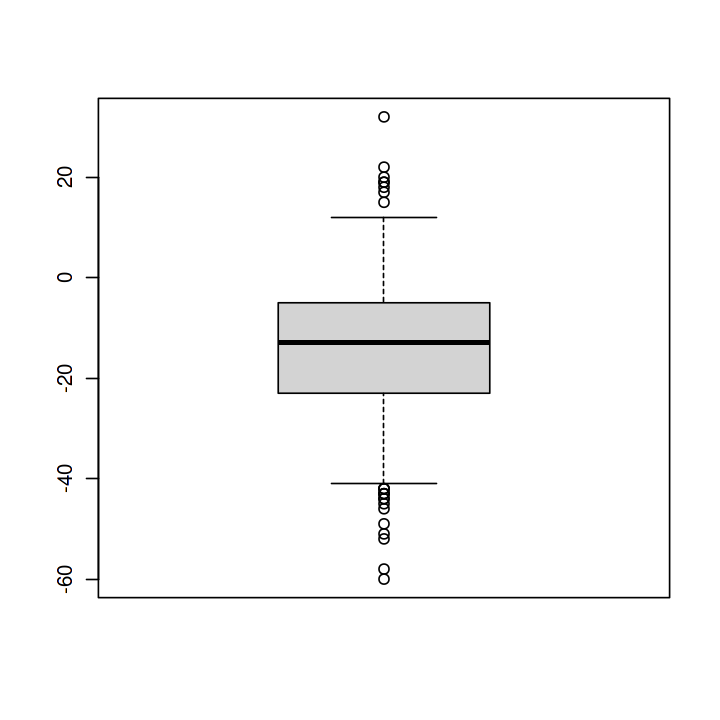

In [6]:
set_plot_dim(6,6)
attach(df2, warn.conflicts = F)
boxplot(DGerror, range=T)
paste('Trimmed mean: ', mean(DGerror, trim=.1))

In [7]:
df3 <- import("./data/NYRedBullsSalaries.txt")
str(df3)

'data.frame':	25 obs. of  1 variable:
 $ V1: num  33750 44000 138188 45567 44000 ...


[1] 25

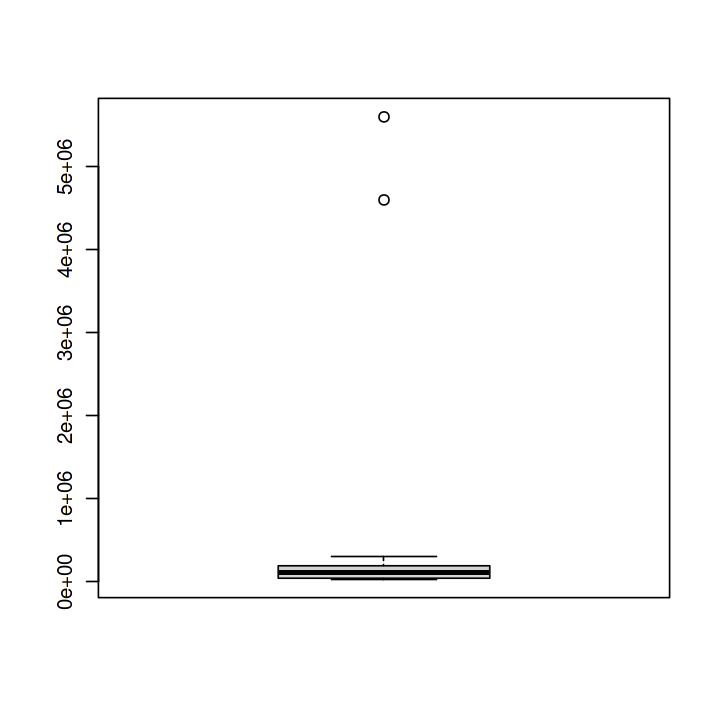

In [8]:
nysal <- df3$V1
boxplot(nysal)
length(nysal)

In [9]:
# Trim top and bottom 8% of salaries
nysal2 <- sort(nysal)[3:23]
length(nysal2)

[1] 21

In [10]:
mean(nysal)
mean(nysal, trim=.08)
median(nysal)

[1] 518311.6

[1] 128109.1

[1] 112495.5

In [11]:
stats = function(data) {
    return(c(median(data),
             IQR(data),
             max(data)-min(data),
             mean(data),
             sd(data)))}

compare = cbind(stats(nysal), stats(nysal2))
rownames(compare)=c('Median','IQR','Range','Mean','SD')

compare
# Observe robustness of median and IQR

Median,112495.5,112495.50
IQR,150375.0,145999.96
Range,5566250.0,268249.00
Mean,518311.6,128109.09
SD,1388822.1,83990.81


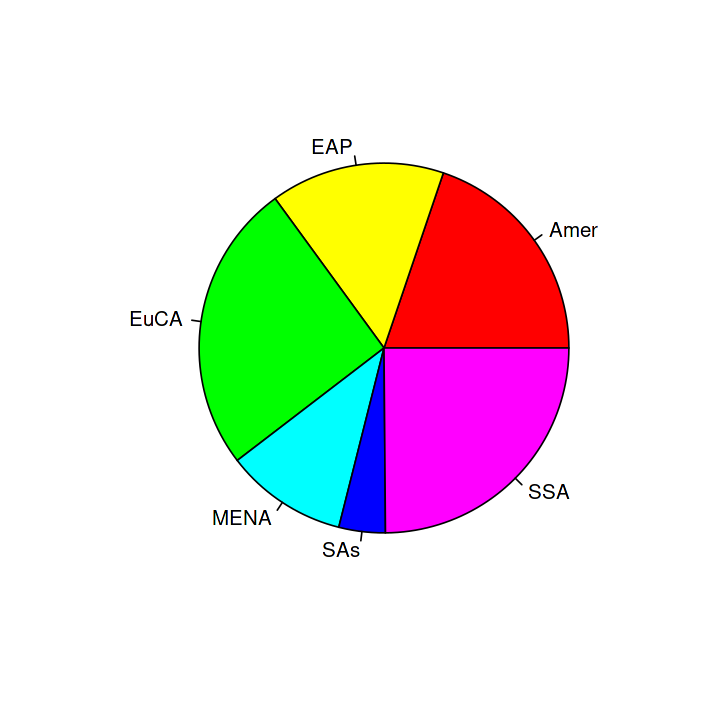

In [12]:
pie(table(df1[,2]), col=rainbow(6))

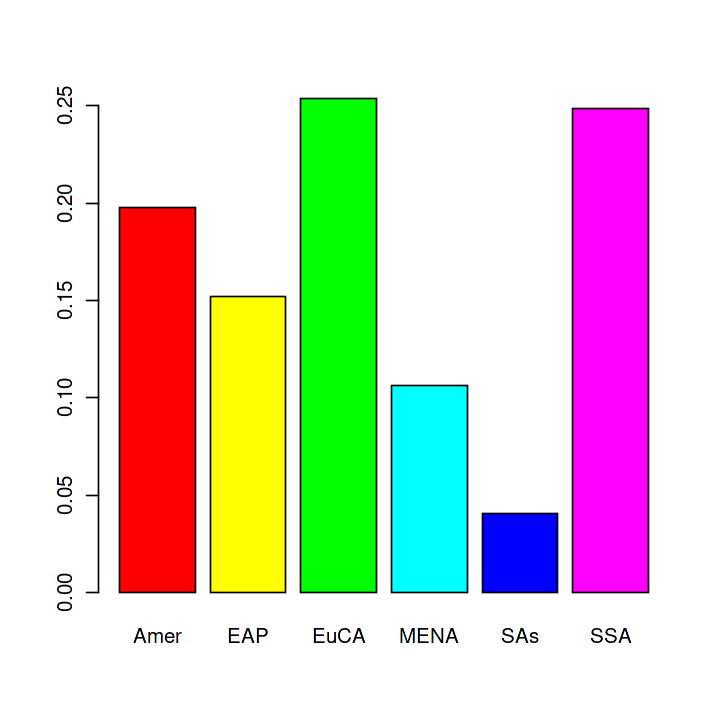

In [13]:
barplot(table(df1[,2])/length(df1[,2]), col=rainbow(6))

## Week 2

In [14]:
str(df2)

'data.frame':	400 obs. of  8 variables:
 $ Sex       : int  2 1 1 1 1 1 1 1 1 1 ...
 $ BMIcat    : chr  "underweight" "normal" "overweight" "overweight" ...
 $ BMIquant  : num  15.7 23 27.9 27.8 21.4 ...
 $ Age       : int  78 44 72 59 60 34 50 73 70 60 ...
 $ DGestimate: int  44 32 32 44 32 25 32 50 39 44 ...
 $ DGerror   : int  -34 -12 -40 -15 -28 -9 -18 -23 -31 -16 ...
 $ SBestimate: int  60 35 61 61 46 35 35 61 46 46 ...
 $ SBerror   : int  -18 -9 -11 2 -14 1 -15 -12 -24 -14 ...


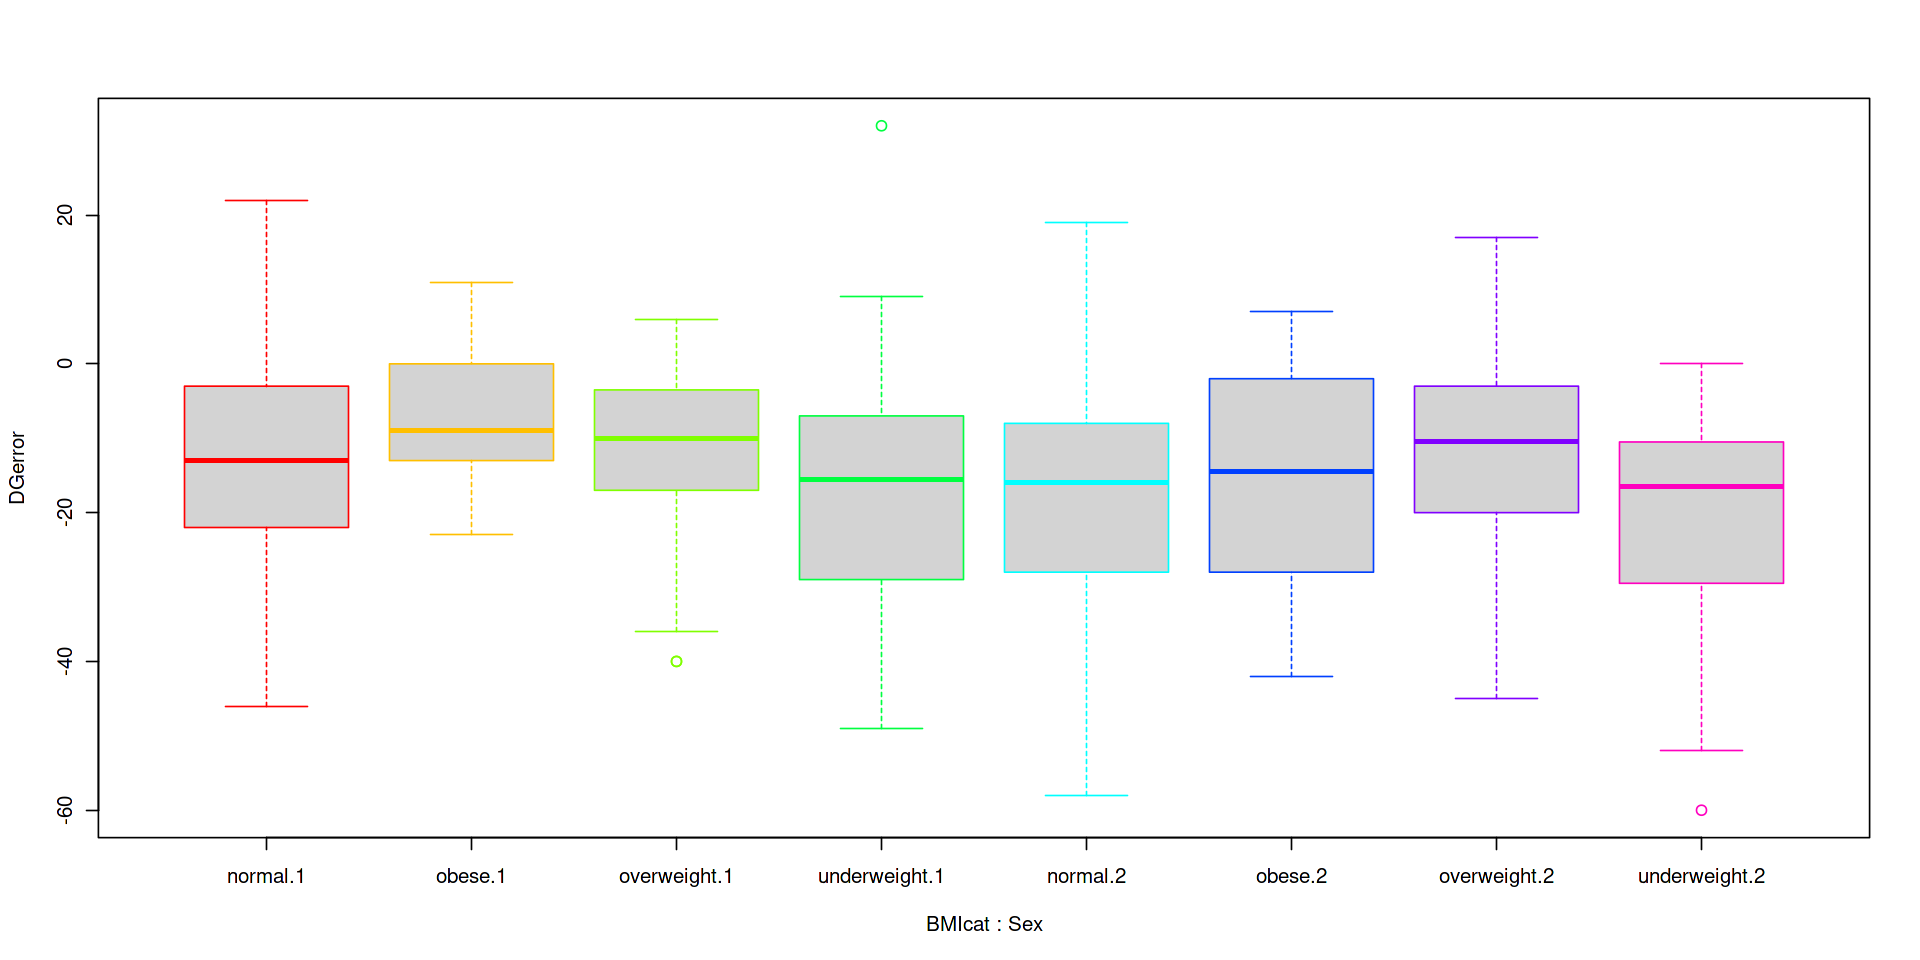

In [15]:
set_plot_dim(16,8)

boxplot(DGerror ~ BMIcat+Sex, df2, border=rainbow(8))

set_plot_dim(6,6)

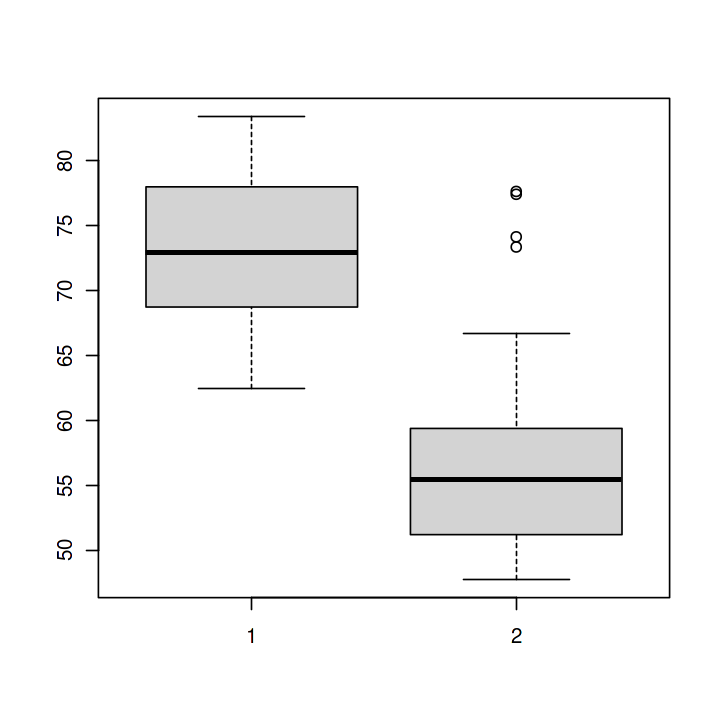

In [16]:
df5 = split(df1,df1$Region)
boxplot(df5$EAP[,3], df5$SSA[,3])